In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
print("---", tf.__version__)

--- 1.15.0


In [3]:
sdata = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetichall103update.csv")
sdata1 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magnetickitchen206updateV2.csv")
sdata2 = pd.read_csv(r"D:\BSC IT DOCX\Research Papers\Research Internship-Columbia\Indoor localization\DatasetV2\magneticroom304update.csv")

sdata.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata1.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']
sdata2.columns = ['TimeStamp', 'X', 'Y', 'Z', 'Magnitude', 'CoordinateID']

In [4]:
# Check the shape of the data

print(sdata.shape,
sdata1.shape,
sdata2.shape)


#Exploratory Data Analysis

df = pd.concat([sdata, sdata1, sdata2], axis=0)

df = df.reset_index(drop=True)

df.head(1000)

(1332, 6) (1558, 6) (1610, 6)


,TimeStamp,X,Y,Z,Magnitude,CoordinateID
0,2020-08-19 07:53:37:962,21.240000,-33.360000,-16.560000,25.664200,1
1,2020-08-19 07:53:37:982,21.300000,-33.540000,-16.500000,25.668268,1
2,2020-08-19 07:53:38:002,20.699999,-33.780000,-16.500000,25.163067,1
3,2020-08-19 07:53:38:022,20.939999,-33.660000,-16.320000,25.248880,1
4,2020-08-19 07:53:38:041,20.880000,-33.239998,-16.500000,25.332674,1
...,...,...,...,...,...,...
995,2020-08-19 07:54:39:599,20.939999,-35.579998,-13.259999,23.305603,1
996,2020-08-19 07:54:39:619,21.060000,-36.059998,-13.139999,23.325162,1
997,2020-08-19 07:54:39:640,20.820000,-35.820000,-13.559999,23.360351,1
998,2020-08-19 07:54:39:659,21.000000,-35.520000,-13.679999,23.603016,1


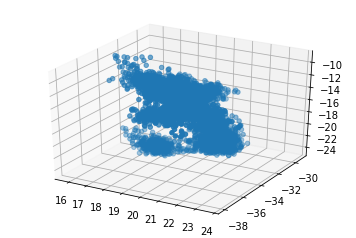

In [38]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
x, y, z = df['X'], df['Y'], df['Z']

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,z,)
plt.show()

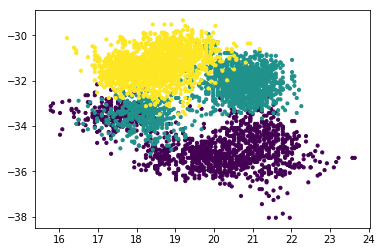

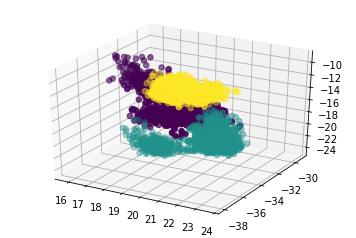

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create Map
cm = plt.get_cmap("RdYlGn")

x, y, z = df['X'], df['Y'], df['Z']
col = df['CoordinateID']

# 2D Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s=10, c=col, marker='o')  

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(x, y, z, s=30, c=col, marker='o')                                                                                

plt.show()

3    1610
2    1558
1    1332
Name: CoordinateID, dtype: int64


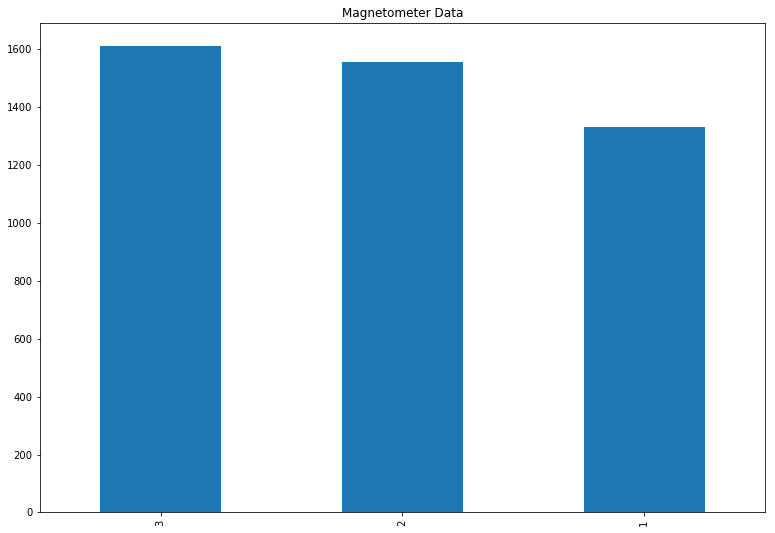

In [5]:
InsData = df['CoordinateID'].value_counts()
print(InsData)
InsData.plot(kind = 'bar', title = 'Magnetometer Data', figsize = (13, 9))

In [6]:
def plot_activity(activity, df):
    rowActivity = (df['CoordinateID'] == activity)
    data = df[rowActivity]
    data = data[['X','Y','Z']]
    data = data[:2000]
    axis = data.plot(subplots=True, figsize=(16,12), title=activity)

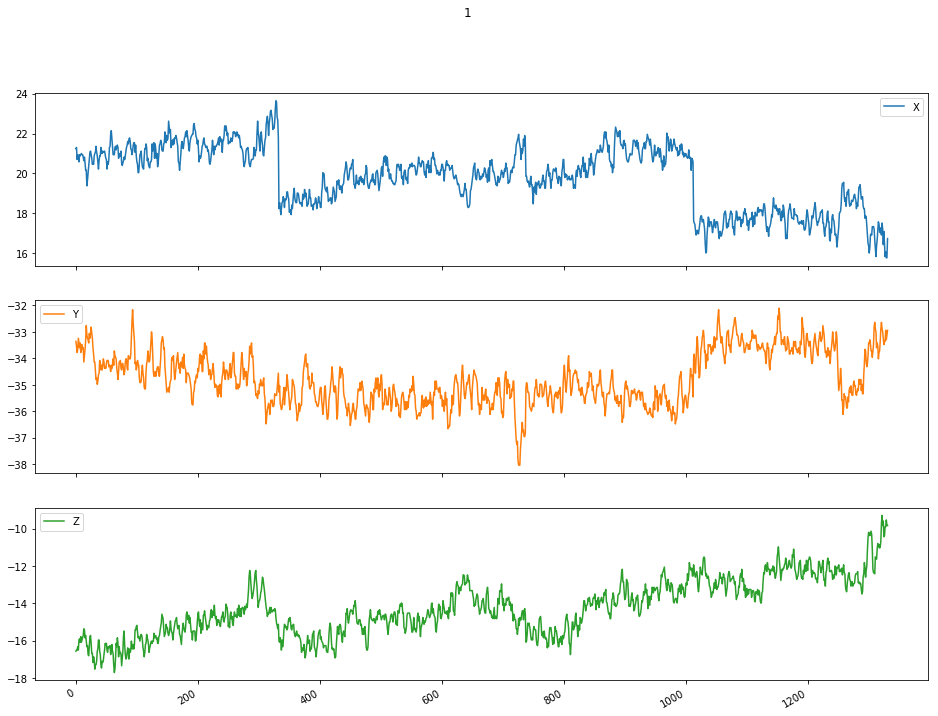

In [7]:
plot_activity(1, df)

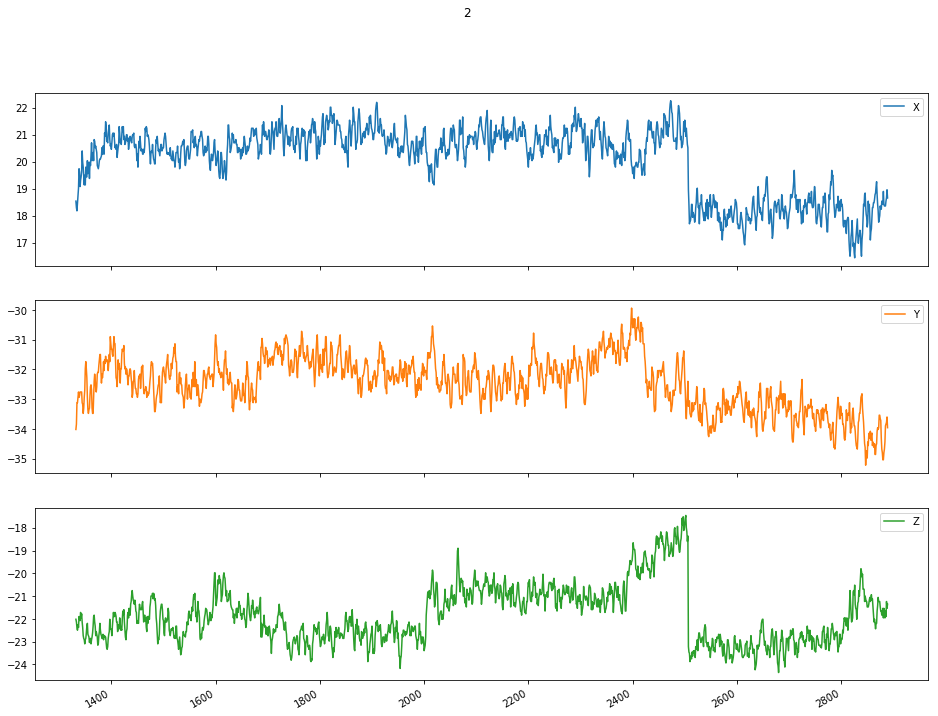

In [42]:
plot_activity(2, df)

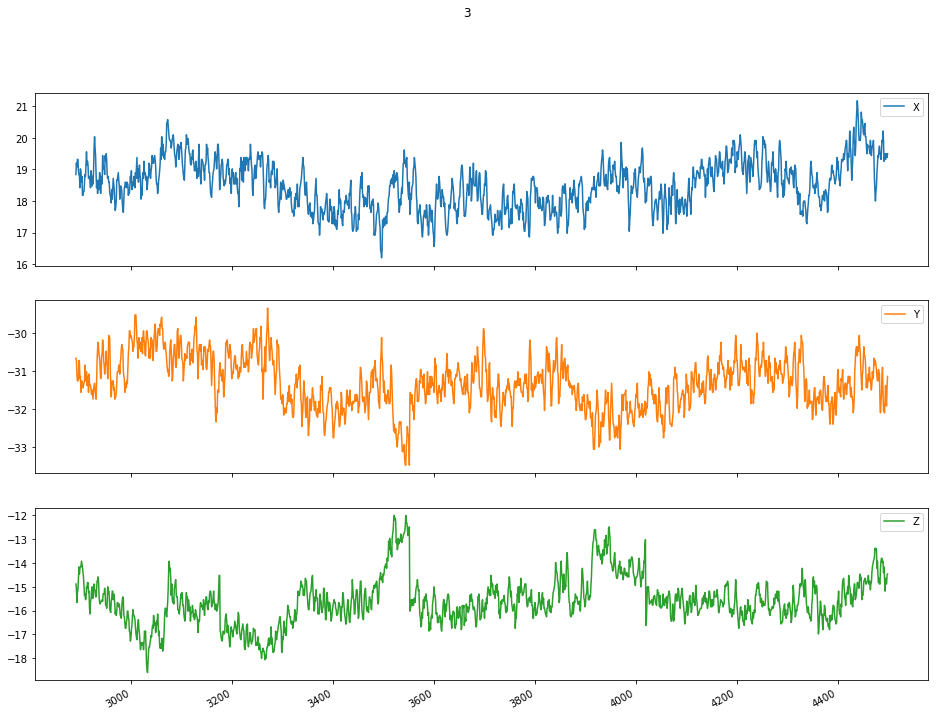

In [43]:
plot_activity(3, df)

In [8]:
df = df.drop(['TimeStamp'], axis = 1) 

In [9]:
df_train, df_test = train_test_split(df, test_size = 0.1, shuffle = True) # Shuffle is set True because the data in in ordered format
print(df_train.shape)
df_train.head(4000)

(4050, 5)


,X,Y,Z,Magnitude,CoordinateID
3320,17.640000,-32.219997,-16.740000,22.955547,3
3935,19.439999,-32.399998,-13.440000,22.220421,3
4175,18.539999,-31.140000,-15.719999,22.990649,3
3718,17.100000,-31.740000,-15.299999,21.517899,3
4001,18.300000,-31.679998,-14.580000,22.002418,3
...,...,...,...,...,...
2722,18.180000,-33.120000,-22.619999,27.855642,2
3452,17.820000,-31.920000,-15.660000,22.337144,3
901,21.480000,-34.920000,-13.740000,24.090206,1
3815,17.880000,-30.960000,-15.240000,22.136665,3


In [10]:
df_test.tail(50)

,X,Y,Z,Magnitude,CoordinateID
2721,18.600000,-33.420000,-22.859999,28.314300,2
1241,17.940000,-33.000000,-12.719999,20.436292,1
2226,20.160000,-32.040000,-20.880000,27.898386,2
3811,17.880000,-31.080000,-15.839999,22.548613,3
262,21.840000,-34.680000,-14.639999,24.939030,1
2375,20.160000,-31.859999,-20.939999,27.949761,2
1310,16.680000,-32.640000,-12.420000,19.162433,1
4177,19.260000,-31.439999,-14.940000,23.049321,3
3151,19.680000,-30.539999,-15.900000,24.063092,3
287,20.580000,-33.600000,-12.960000,22.897555,1


In [11]:
scale_columns = ['X', 'Y', 'Z']
scaler = RobustScaler()
scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(
   df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
    df_test[scale_columns].to_numpy()
)

C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Anuj\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
def create_dataset(X, y, time_steps = 1, step = 1):
    Xs, ys = [], []
    for index in range(0, len(X) - time_steps, step):
        v = X.iloc[index:(index + time_steps)].values
        labels = y.iloc[index:index + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [13]:
TIME_STEPS = 24
STEP = 1
X_train, y_train = create_dataset(
    df_train[['X', 'Y', 'Z']],
    df_train.CoordinateID,
    TIME_STEPS,
    STEP
)
X_test, y_test = create_dataset(
    df_test[['X', 'Y', 'Z']],
    df_test.CoordinateID,
    TIME_STEPS,
    STEP
)
print(X_train.shape, y_train.shape)

(4026, 24, 3) (4026, 1)


In [14]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder = encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_test.shape

(426, 3)

In [15]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4026, 24, 3) (4026, 3) (426, 24, 3) (426, 3)


## Model

In [16]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
    keras.layers.LSTM(
    units = 128,
    input_shape = [X_train.shape[1], X_train.shape[2]]
    )
)
)
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation = 'softmax'))
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['acc']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               135168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 168,451
Trainable params: 168,451
Non-trainable params: 0
_________________________________________________________________


## Training phase

In [46]:
history3 = model.fit(
    X_train, y_train,
    epochs=35,
    batch_size=1020,
    validation_split = 0.1,
    shuffle=False
)

Train on 3623 samples, validate on 403 samples
Epoch 1/35
3623/3623 [==============================] - 6s 2ms/step - loss: 0.0972 - acc: 0.9625 - val_loss: 0.8285 - val_acc: 0.7345
Epoch 2/35
3623/3623 [==============================] - 3s 835us/step - loss: 0.0967 - acc: 0.9649 - val_loss: 0.8272 - val_acc: 0.7469
Epoch 3/35
3623/3623 [==============================] - 3s 802us/step - loss: 0.0940 - acc: 0.9652 - val_loss: 0.8224 - val_acc: 0.7519
Epoch 4/35
3623/3623 [==============================] - 3s 804us/step - loss: 0.0870 - acc: 0.9674 - val_loss: 0.8116 - val_acc: 0.7593
Epoch 5/35
3623/3623 [==============================] - 3s 794us/step - loss: 0.0871 - acc: 0.9685 - val_loss: 0.7949 - val_acc: 0.7593
Epoch 6/35
3623/3623 [==============================] - 3s 862us/step - loss: 0.0853 - acc: 0.9661 - val_loss: 0.7750 - val_acc: 0.7643
Epoch 7/35
3623/3623 [==============================] - 3s 890us/step - loss: 0.0767 - acc: 0.9718 - val_loss: 0.7563 - val_acc: 0.7643
Epo

In [47]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 1s 2ms/step


[1.0491527968169378, 0.748826265335083]

In [19]:
history4 = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=100,
    validation_split = 0.1,
    shuffle=True
)

Train on 3623 samples, validate on 403 samples
Epoch 1/20
3623/3623 [==============================] - 3s 945us/step - loss: 0.2440 - acc: 0.8979 - val_loss: 0.3887 - val_acc: 0.8313
Epoch 2/20
3623/3623 [==============================] - 3s 920us/step - loss: 0.2359 - acc: 0.9037 - val_loss: 0.4014 - val_acc: 0.8288
Epoch 3/20
3623/3623 [==============================] - 3s 909us/step - loss: 0.2264 - acc: 0.9045 - val_loss: 0.3952 - val_acc: 0.8288
Epoch 4/20
3623/3623 [==============================] - 3s 921us/step - loss: 0.2261 - acc: 0.9031 - val_loss: 0.3934 - val_acc: 0.8412
Epoch 5/20
3623/3623 [==============================] - 4s 985us/step - loss: 0.2215 - acc: 0.9106 - val_loss: 0.4963 - val_acc: 0.7965
Epoch 6/20
3623/3623 [==============================] - 4s 986us/step - loss: 0.2179 - acc: 0.9075 - val_loss: 0.4115 - val_acc: 0.8288
Epoch 7/20
3623/3623 [==============================] - 4s 1ms/step - loss: 0.2114 - acc: 0.9108 - val_loss: 0.4155 - val_acc: 0.8213
Epo

In [20]:
history5 = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=100,
    validation_split = 0.1,
    shuffle=False
)

Train on 3623 samples, validate on 403 samples
Epoch 1/10
3623/3623 [==============================] - 3s 910us/step - loss: 0.1861 - acc: 0.9233 - val_loss: 0.6709 - val_acc: 0.7568
Epoch 2/10
3623/3623 [==============================] - 3s 904us/step - loss: 0.1852 - acc: 0.9224 - val_loss: 0.5145 - val_acc: 0.8089
Epoch 3/10
3623/3623 [==============================] - 3s 904us/step - loss: 0.1791 - acc: 0.9263 - val_loss: 0.6515 - val_acc: 0.7816
Epoch 4/10
3623/3623 [==============================] - 3s 962us/step - loss: 0.1811 - acc: 0.9269 - val_loss: 0.5817 - val_acc: 0.7841
Epoch 5/10
3623/3623 [==============================] - 4s 972us/step - loss: 0.1673 - acc: 0.9349 - val_loss: 0.5242 - val_acc: 0.8040
Epoch 6/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.1482 - acc: 0.9404 - val_loss: 0.7227 - val_acc: 0.7568
Epoch 7/10
3623/3623 [==============================] - 4s 1ms/step - loss: 0.1549 - acc: 0.9360 - val_loss: 0.6995 - val_acc: 0.7543
Epoch

In [21]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 0s 444us/step


[0.8880266420578173, 0.7535211443901062]

In [22]:
history5 = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=10,
    validation_split = 0.1,
    shuffle=False
)

Train on 3623 samples, validate on 403 samples
Epoch 1/20
3623/3623 [==============================] - 12s 3ms/step - loss: 0.6908 - acc: 0.7450 - val_loss: 0.5725 - val_acc: 0.7469
Epoch 2/20
3623/3623 [==============================] - 11s 3ms/step - loss: 0.3768 - acc: 0.8507 - val_loss: 0.5906 - val_acc: 0.7097
Epoch 3/20
3623/3623 [==============================] - 11s 3ms/step - loss: 0.2925 - acc: 0.8794 - val_loss: 0.5842 - val_acc: 0.7221
Epoch 4/20
3623/3623 [==============================] - 12s 3ms/step - loss: 0.2533 - acc: 0.8984 - val_loss: 0.6464 - val_acc: 0.7196
Epoch 5/20
3623/3623 [==============================] - 11s 3ms/step - loss: 0.2212 - acc: 0.9120 - val_loss: 0.6363 - val_acc: 0.7519
Epoch 6/20
3623/3623 [==============================] - 11s 3ms/step - loss: 0.2193 - acc: 0.9089 - val_loss: 0.5722 - val_acc: 0.7643
Epoch 7/20
3623/3623 [==============================] - 12s 3ms/step - loss: 0.2070 - acc: 0.9153 - val_loss: 0.6908 - val_acc: 0.7320
Epoch 8/

In [23]:
model.evaluate(X_test, y_test)

426/426 [==============================] - 0s 467us/step


[1.0881444484415188, 0.7276995182037354]

In [24]:
X_test

array([[[-0.38461538, -0.31707249,  0.45714293],
        [-0.28205128,  0.58536609, -0.02857143],
        [-0.66666667,  0.17073218, -0.03809509],
        ...,
        [-0.64102564, -0.56097584,  0.51428595],
        [-0.76923077, -0.70731736,  0.79047632],
        [-0.66666667,  0.51219574, -0.03809509]],

       [[-0.28205128,  0.58536609, -0.02857143],
        [-0.66666667,  0.17073218, -0.03809509],
        [-0.43589786,  0.2682932 ,  0.        ],
        ...,
        [-0.76923077, -0.70731736,  0.79047632],
        [-0.66666667,  0.51219574, -0.03809509],
        [ 0.07692308,  0.80487838, -0.4285715 ]],

       [[-0.66666667,  0.17073218, -0.03809509],
        [-0.43589786,  0.2682932 ,  0.        ],
        [ 0.79487179, -0.17073178, -0.62857153],
        ...,
        [-0.66666667,  0.51219574, -0.03809509],
        [ 0.07692308,  0.80487838, -0.4285715 ],
        [ 1.41025641, -1.5853665 ,  0.24761909]],

       ...,

       [[-0.0769235 , -0.34146355,  0.49523817],
        [-0

In [25]:
y_pred = model.predict(X_test)
y_test.shape

(426, 3)

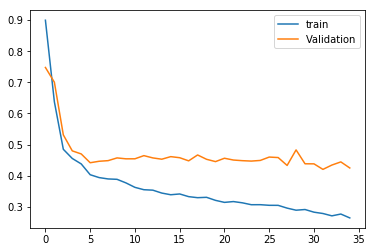

In [27]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='Validation')
plt.legend()

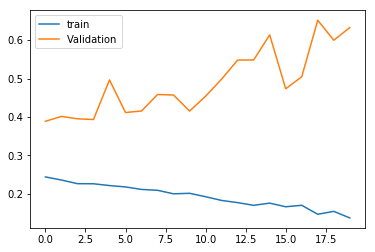

In [28]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'],label='train')
plt.plot(history4.history['val_loss'],label='Validation')
plt.legend()

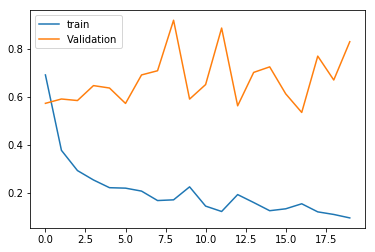

In [29]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'],label='train')
plt.plot(history5.history['val_loss'],label='Validation')
plt.legend()

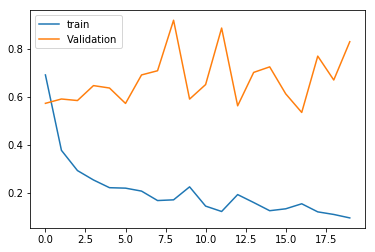

In [30]:
import matplotlib.pyplot as plt
plt.plot(history5.history['loss'],label='train')
plt.plot(history5.history['val_loss'],label='Validation')
plt.legend()

## Model Accuracy

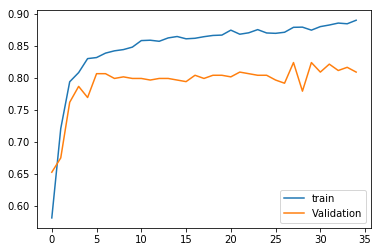

In [31]:
import matplotlib.pyplot as plt
plt.plot(history3.history['acc'],label='train')
plt.plot(history3.history['val_acc'],label='Validation')
plt.legend()

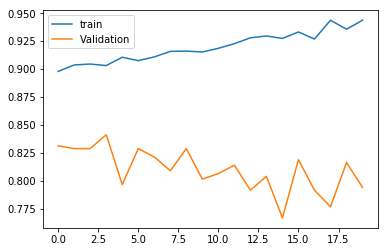

In [32]:
import matplotlib.pyplot as plt
plt.plot(history4.history['acc'],label='train')
plt.plot(history4.history['val_acc'],label='Validation')
plt.legend()

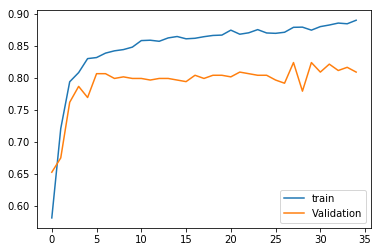

In [33]:
import matplotlib.pyplot as plt
plt.plot(history3.history['acc'],label='train')
plt.plot(history3.history['val_acc'],label='Validation')
plt.legend()

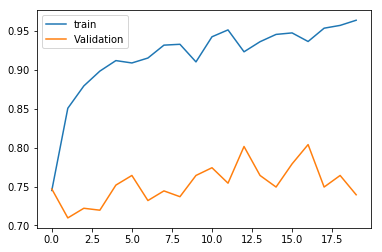

In [34]:
import matplotlib.pyplot as plt
plt.plot(history5.history['acc'],label='train')
plt.plot(history5.history['val_acc'],label='Validation')
plt.legend()

In [36]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(19, 8)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

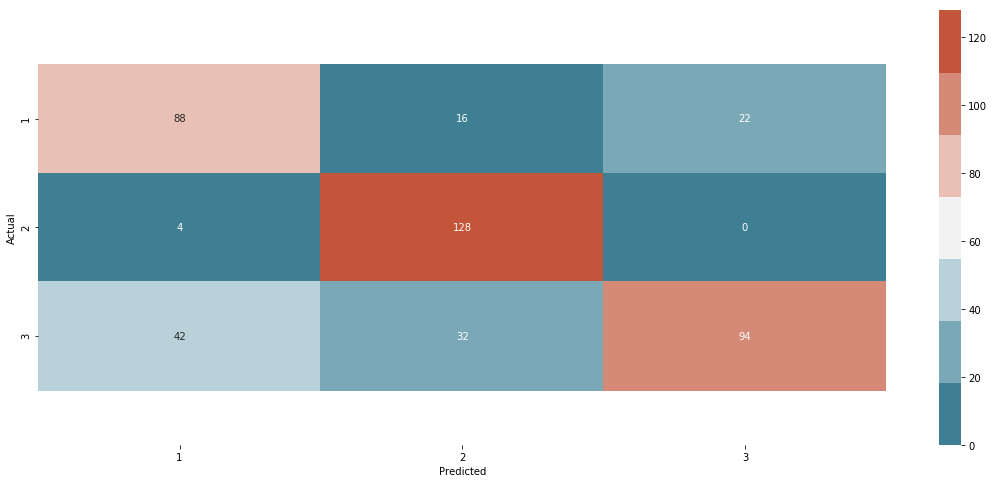

In [37]:
plot_cm(
  encoder.inverse_transform(y_test),
  encoder.inverse_transform(y_pred),
  encoder.categories_[0]
)

In [45]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model.h5")